# Сборный проект

**Описание проекта**

**Цель проекта**: требуется отработать принцип работы с данными и выявить определяющие успешность игры закономерности для руководства интернет магазина "Стримчик" (интернет магазин продающий компьютерные игры по всему миру), что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
-`Year_of_Release` — год выпуска
-`Genre` — жанр игры
-`NA_sales` — продажи в Северной Америке (миллионы проданных копий)
-`EU_sales` — продажи в Европе (миллионы проданных копий)
-`JP_sales` — продажи в Японии (миллионы проданных копий)
-`Other_sales` — продажи в других странах (миллионы проданных копий)
-`Critic_Score` — оценка критиков (максимум 100)
-`User_Score` — оценка пользователей (максимум 10)
-`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**

1. Изучим общую информацию
2. Проведём предобработку данных
3. Проведем исследовательский анализ данных
4. Составим портрет пользователя каждого региона
5. Проверим гипотезы
6. Напишем общий вывод

**Импортируем библиотеки:**

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### Изучим общую информацию

#### Читаем данные

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Получаем общую информацию о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по ознакомлению с данными:**

- Всего в таблице 16715 строк и 11 колонок, имеются пропуски в данных;
- Названия колонок имеют нарушение стилей;
- Ряд колонок имеет неверный тип;
- Данных достаточно для проведения исследования.

### Предобработка данных

#### Переименуем столбцы

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Удалим полные дубликаты

In [6]:
df = df.drop_duplicates()

print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())
print(df[df.duplicated(['name', 'platform', 'year_of_release'])])
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])
print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64
                name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E  
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Во всех данных провели поиск неявных дубликатов одновременно по столбцам `name`, `platform`, `year_of_release`. Таких дубликатов оказалось всего два. Отобразили количество повторов по столбцам. Вывели эти строки и удалили с последующей проверкой.

#### Обработка пропусков

Обработка `name`

In [7]:
print('В столбце `name` нет значений в ', (df['name'].isnull().sum() / len(df['name'])*100).round(3), '% данных. \nПри значении меньше 1 % примем решение удалить строки с пропусками в столбце `name` \nТогда всего пропусков останется \n')
df = df.dropna(subset=['name'])
df.isna().sum()

В столбце `name` нет значений в  0.006 % данных. 
При значении меньше 1 % примем решение удалить строки с пропусками в столбце `name` 
Тогда всего пропусков останется 



name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Обработка `year_of_release`

In [8]:
print('В столбце `year_of_release` нет значений в ', (df['year_of_release'].isnull().sum() / len(df['name'])*100).round(3), '% данных')
df = df.dropna(subset=['year_of_release'])
df.isna().sum()

В столбце `year_of_release` нет значений в  1.61 % данных


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Обработка `critic_score`

In [9]:
df['critic_score'].isna().sum() / len(df['name'])*100

51.45654685884571

Количество пропусков больше 51 %. Заменить на медиану и среднее нецелесообразно. Пометим отрицательным значением "-1"

In [10]:
df['critic_score'] = df['critic_score'].fillna(-1)

Обработка `user_score`

In [11]:
df['user_score'].isna().sum() / len(df['name'])*100

40.16906890470109

Количество пропусков больше 40 %. Заменить на медиану и среднее нецелесообразно. Пометим отрицательным значением "-1"

In [12]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].value_counts() 

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.5       2
0.6       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [13]:
df[df['user_score']=='tbd']['user_score'].count() / len(df['name'])*100

14.449917898193759

В столбце имеется оценка `tbd` не описанная в полученных данных, при этом ее значение больше 14%. Игнорировать это нельзя обозначим как "-1"

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'].value_counts() 

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1         2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Обработка `rating`

In [15]:
df['rating'].isna().sum() / len(df['name'])*100

40.60086358936933

Количество пропусков больше 40 %. Заменить на медиану и среднее нецелесообразно. Пометим что возрастная категория неизвестна "unknown".

In [16]:
df['rating'] = df['rating'].fillna('unknown')
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Преобразование типов столбцов

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
df['year_of_release'] = (df['year_of_release']).astype('int')
df['critic_score'] = (df['critic_score']).astype('int')
df['user_score'] = (df['user_score']).astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [19]:
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


**Вывод по предобработке данных:**

- Явные дубликаты не обнаружены;
- Удалены строки с неявными дубликатами поиск одновременно по `name`, `platform`, `year_of_release`;
- По столбцу `name` удалены 2 строки с пропусками;
- По столбцу `year_of_release` принято решение удалить строки с пропусками;
- В столбце `critic_score` количество пропусков больше 51% они обозначены как `-1`;
- В столбце `user_score` количество пропусков больше 40% они обозначены как `-1`, неописанное значение `tbd` обозначено как `-2`;
- В столбце `rating` пропуски обозначены как `unknown`;
- Столбцы `year_of_release`, `critic_score` приведены к `int` типу, `user_score` к `float` в соответствии с данными содержащимися в них;
- Пропуски могли появиться из-за сбора данных из различных источников, которые не согласованы между собой;
- Посчитали суммарные продажи во всех регионах записали в `total_sales`.

### Проведем исследовательский анализ данных

#### Исследование выпуска игр по годам

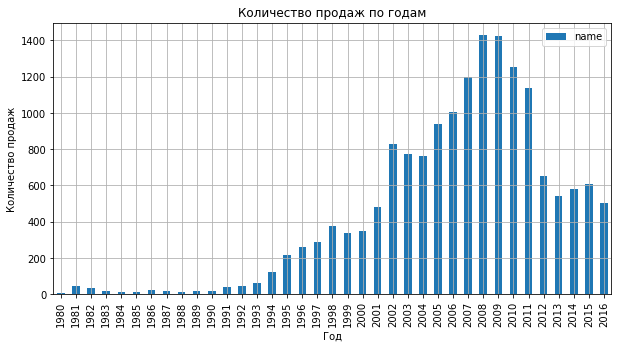

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [20]:
(
    df
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

df[df['year_of_release'] > -1]['year_of_release'].describe()

**Вывод по выпуску игр по годам**

- В таблице представлены игры выпущенные с 1980 по 2016 год;
- Присутствуют игры у которых не указан год выпуска в количестве 269;
- Рост числа выпуска игр приходится на 1995 год, с максимумом примерно в 2007 году после чего прослеживается спад;
- С 2012 года объем выпуска игр стабилизировался и год от года отличался не сильно;
- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).

#### Исследование продаж по платформам

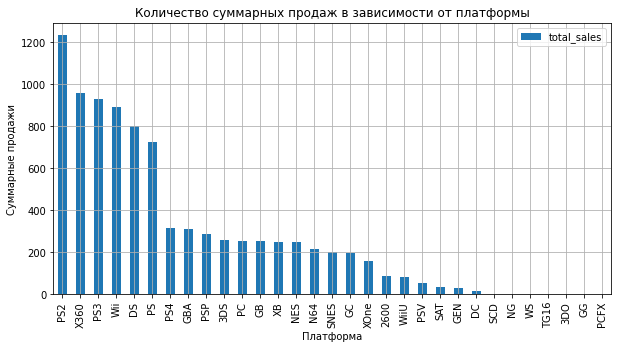

In [21]:
(
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество суммарных продаж в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

Наибольшее суммарных продаж зафиксировано у 6 платформ

In [22]:
top_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
top_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

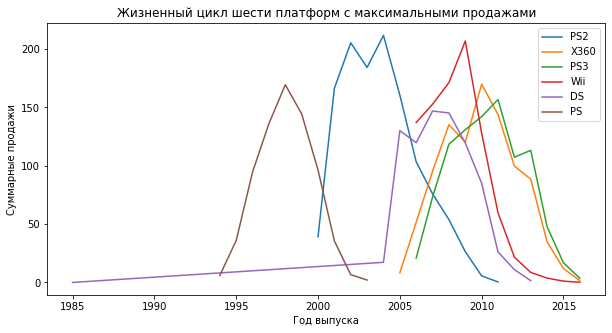

In [23]:
for name in top_sales:
    (
    df.query('platform == @name and year_of_release > -1')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Проанализируем артефакт на графике по консоли `DS`

In [24]:
print(df.query('platform == "DS" and year_of_release < 1990'))

                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

        rating  total_sales  
15957  unknown         0.02  


В данных только одна строка и это явная ошибка, возникшая при заполнении данных в столбце `name`. Примем решение удалить эту строку по её индексу и перестроить график жизненного цикла консолей

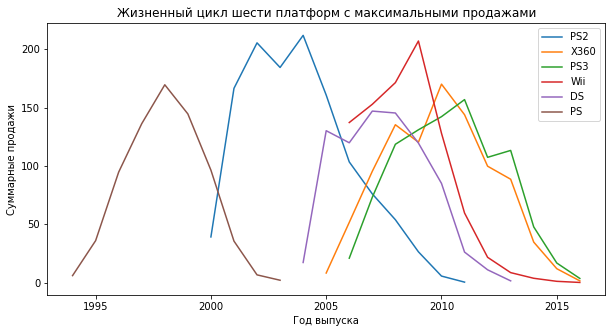

In [25]:
df = df.drop(index = 15957)
for name in top_sales:
    (
    df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Расчитаем время жизненного цикла по всем данным

In [26]:
time_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 
print('Медианное значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет')

Медианное значение жизненного цикла по всей выборке 7.0 лет


In [27]:
time_life_top = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index().head(6)
time_life_top['life'] = time_life_top['max'] - time_life_top['min'] + 1 
print('Медианное значение жизненного цикла по популярным платформам', time_life_top['life'].median(), 'лет')

Медианное значение жизненного цикла по популярным платформам 10.0 лет


В исследовании нас интерисует когда продажи по платформам растут или когда она находится на пике, а это первая половина жизненного цикла платформ с округлением в большую сторону.

In [28]:
t = np.ceil(time_life['life'].median()/2)
print('Определим актуальный период за последние', t, 'года')

Определим актуальный период за последние 4.0 года


**Вывод исследования продаж по платформам**

Из графиков видно, что от срока появления платформы до их исчезновения как правило проходит 10 лет, следовательно для нас интересны платформы релиз которых состоялся 3-5 годами ранее и которые активно растут в продажах. Определим, что актуальный период составляет 4 последних года.

#### Исследование перспективных платформ

In [29]:
actual_platforms = (df
    .query('year_of_release >= 2016-@t')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(10)['platform'].tolist()
    )                         
actual_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

In [30]:
actual_df = df.query('year_of_release >= 2016-@t').copy().reset_index(drop= True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


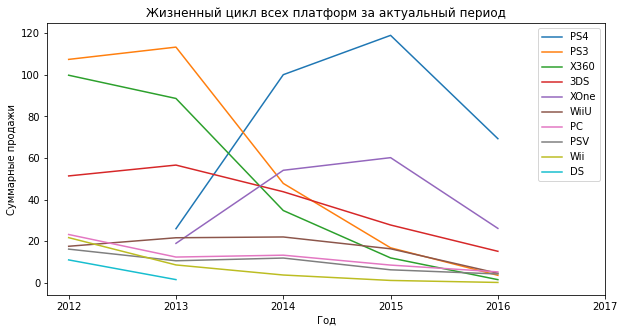

In [31]:
for name in actual_platforms:
    (
    actual_df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл всех платформ за актуальный период')
    plt.xticks(np.arange(2012, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

**Вывод по исследованию перспективных платформ**

Из графика видно, что на 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли `PS4` и `XOne`, но у них также прослеживаются уменьшения продаж.

#### Исследуем "Boxplot" - «ящик с усами» по глобальным продажам игр в разбивке по платформам актуального периода

Text(0, 0.5, 'Продажи по платформам')

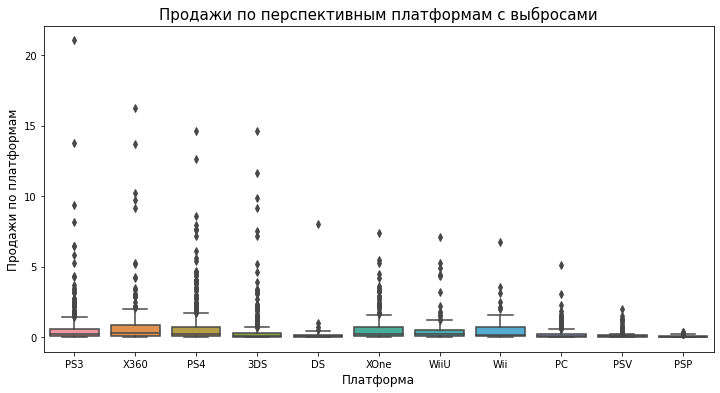

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_df, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)

In [33]:
actual_df['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продажи по платформам')

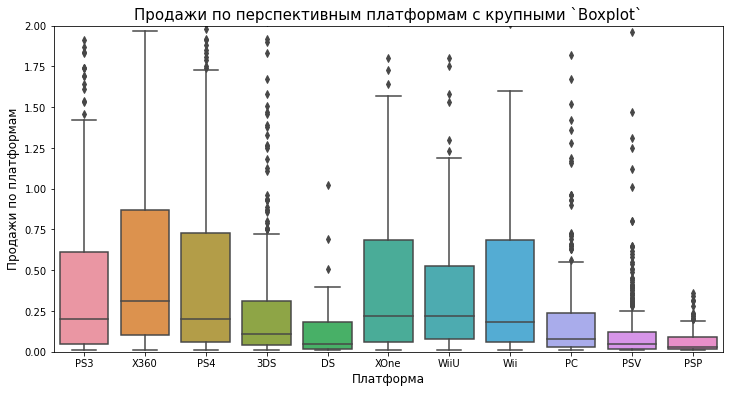

In [34]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по перспективным платформам с крупными `Boxplot`', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)

**Вывод по построению диаграммы `Boxplot`**

Описательная статистика данных за актуальный период указывает:

- Медианное значение по всей выборке составляет 0,12 но у большинства консолей данный показатель не совпадает с основным;
- По первой и третьей квартили также наблюдается большой разброс;
- По всем консолям присутствуют выбросы по продажам.

#### Влияние отзывов на продажи пользователей и критиков

Отберем 5 платформ с максимальными продажами

In [35]:
actual_platforms_5 = (actual_df
    
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
actual_platforms_5

['PS4', 'PS3', 'X360', '3DS', 'XOne']

Построим диаграмму распределения и вычислим корреляцию между оценкой пользователей и продажами в разрезе отдельных платформ

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376


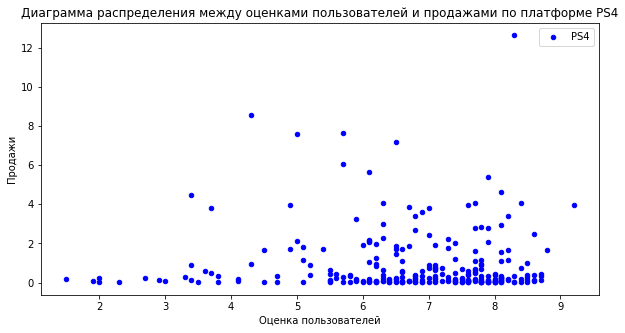

Корреляция между оценками пользователей и продажами по платформе PS3  = -0.006205767686051523


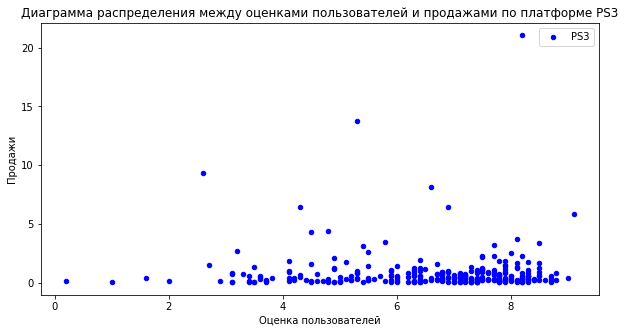

Корреляция между оценками пользователей и продажами по платформе X360  = 0.006163978646213326


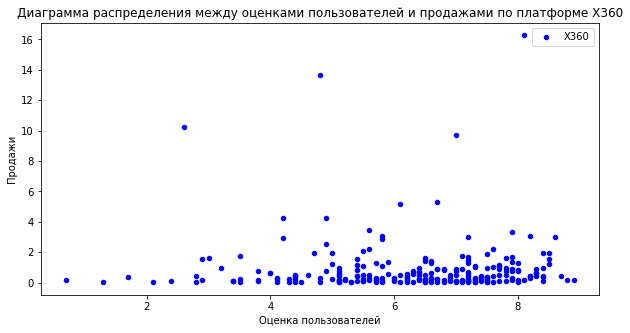

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.19758263411038599


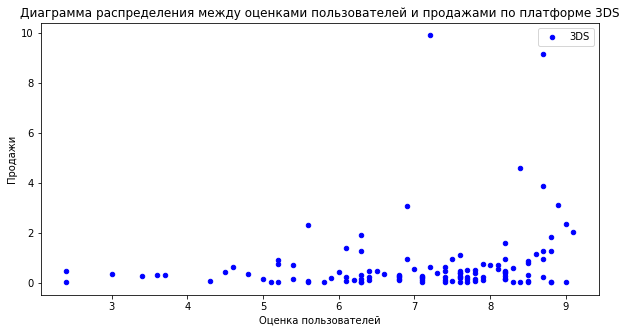

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


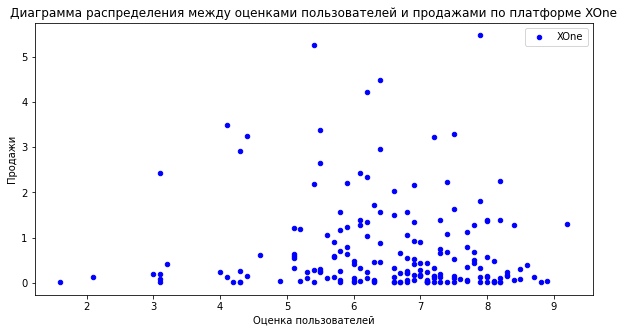

In [36]:
for name in actual_platforms_5:
    (
    actual_df
        .query('platform == @name and user_score > -1')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
    )
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками пользователей и продажами по платформе {name}  =', actual_df.query('platform == @name and user_score > -1')['user_score'].corr(actual_df.query('platform == @name and user_score > -1')['total_sales']))
    plt.show()

Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это.

Построим диаграмму распределения и вычислим корреляцию между оценкой критиков и продажами в разрезе отдельных платформ

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095


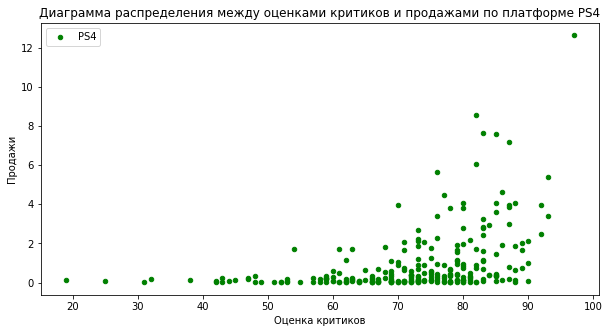

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3341517575509856


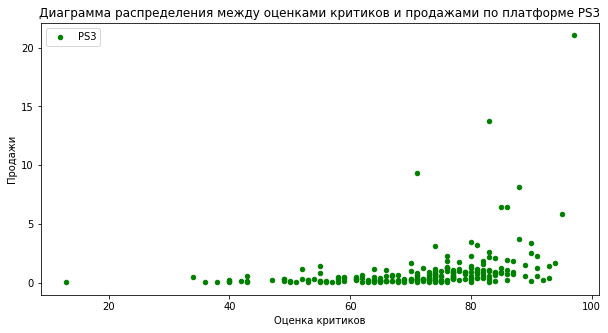

Корреляция между оценками критиков и продажами по платформе X360  = 0.3605734888507336


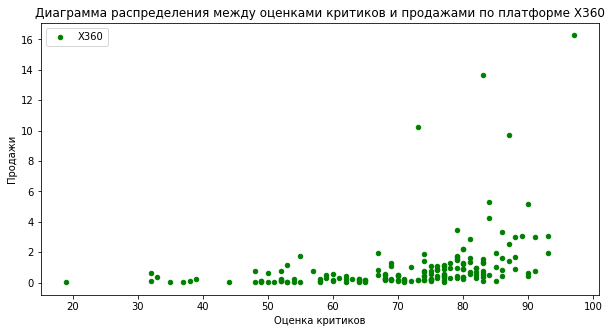

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3208028695360785


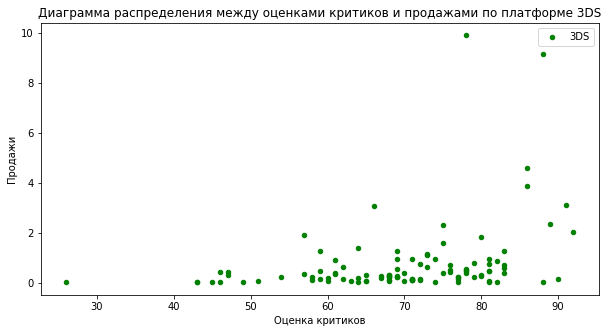

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


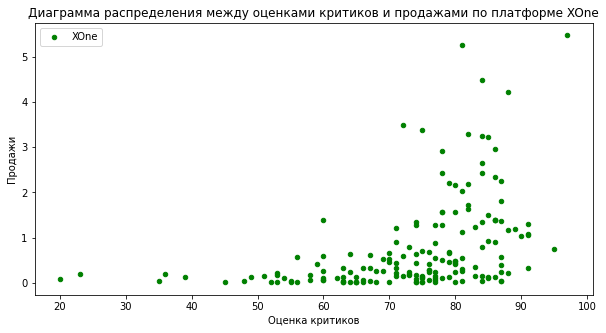

In [37]:
for name in actual_platforms_5:
    (
    actual_df
        .query('platform == @name and critic_score > -1')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='green')
    )
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками критиков и продажами по платформе {name}  =', actual_df.query('platform == @name and critic_score > -1')['critic_score'].corr(actual_df.query('platform == @name and critic_score > -1')['total_sales']))
    plt.show()

Диаграммы распределения явно показывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (колеблется от 0,32 до 0,42).

Сделаем аналогичные расчеты для всего набора данных

In [38]:
print('Общая корреляция между оценками пользователей и продажами = ', actual_df.query('user_score > -1')['user_score'].corr(actual_df['total_sales']))
print('Общая корреляция между оценками критиков и продажами = ', actual_df.query('critic_score > -1')['critic_score'].corr(actual_df['total_sales']))

Общая корреляция между оценками пользователей и продажами =  0.0041944811069172284
Общая корреляция между оценками критиков и продажами =  0.30863336128976016


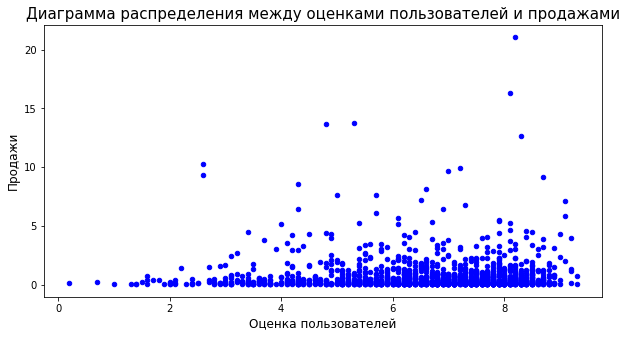

In [39]:
(
 actual_df.query('user_score > -1')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
)
plt.title('Диаграмма распределения между оценками пользователей и продажами', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

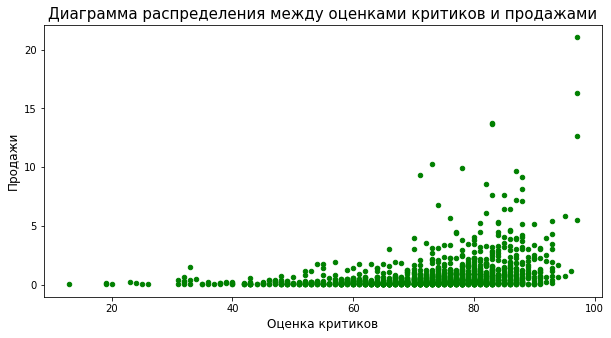

In [40]:
(
 actual_df.query('critic_score > -1')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='green')
)
plt.title('Диаграмма распределения между оценками критиков и продажами', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

Расчитанная корреляция по актуальному периоду указывает что:

- Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами по всей совокупности данных (приближается к 0,004);
- Диаграммы распределения явно показывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (приближается к 0,31).

**Выводы исследования влияния отзывов на продажи пользователей и критиков**

Диаграммы зависимости оценок на показатели продаж и коэффициенты корреляции по отдельным платформам указывают, что:

- Между оценками пользователей и продажами слабая связь и нелинейная;
- Между оценками критиков и продажами связь умеренная и скорее всего нелинейная.

По отношению к общим показателям значения даже больше, что указывает на то, что по всем платформам:

- Между оценками пользователей и продажами слабая связь и нелинейная;
- Между оценками критиков и продажами связь умеренная и скорее всего нелинейная.

#### Исследование распределения игр по жанрам

Построим сумму продаж по жанрам (в разрезе жанров определим самые прибыльные и определим сумму продаж)

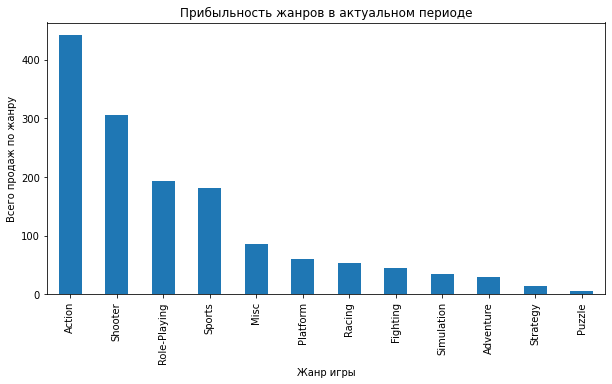

In [41]:
(actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Прибыльность жанров в актуальном периоде')
 .set(xlabel='Жанр игры', ylabel='Всего продаж по жанру'))

plt.show()

Построим диаграмму размаха

Text(0, 0.5, 'Продажи по жанрам')

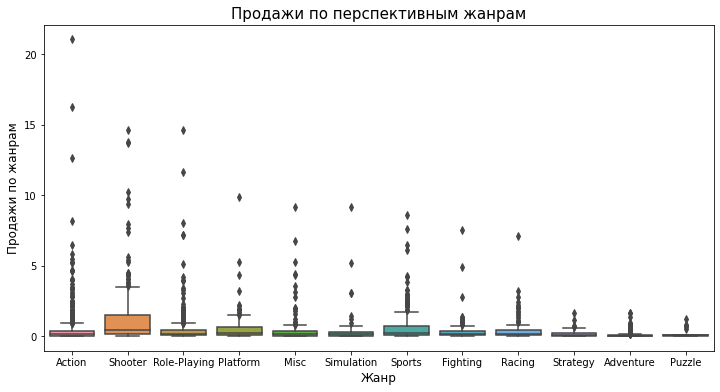

In [42]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

Text(0, 0.5, 'Продажи по жанрам')

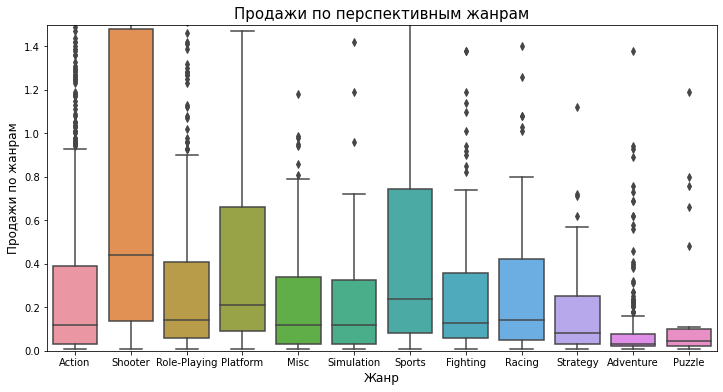

In [43]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
ax.set(ylim=(0,1.5))
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

In [44]:
(
 actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


**Вывод исследования игр по жанрам**

- За последние четыре года наиболее востребованными являются `Action` и `Shooter`;
- Дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров указывает, что предпочтение в жанрах надо отдавать `Shooter` и `Sports`, обладающих большим медианным значением прибыли.

**Вывод по исследовательскому анализу данных**

- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок);
- Определили, что актуальный период составляет 4 последних года;
- На 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли `PS4` и `XOne`, но у них также прослеживаются уменьшения продаж;
- Между оценками пользователей и продажами слабая связь и нелинейная;
- Между оценками критиков и продажами связь умеренная и скорее всего нелинейная;
- Предпочтение в жанрах надо отдавать `Shooter` и `Sports`, обладающих большим медианным значением прибыли.

### Составим портрет пользователя каждого региона

#### Топ-5 самых популярных платформ по регионам

Создадим общую таблицу

In [45]:
na = (
      actual_df
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'platform'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_df
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'platform'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_df
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'platform'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
ps = pd.merge(na, eu, left_index=True, right_index=True)
ps = pd.merge(ps, jp, left_index=True, right_index=True)
ps.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )

ps

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,140.05,PS4,141.09,3DS,87.79
1,PS4,108.74,PS3,106.85,PS3,35.29
2,PS3,103.38,X360,74.52,PSV,21.04
3,XOne,93.12,XOne,51.59,PS4,15.96
4,3DS,55.31,3DS,42.64,WiiU,13.01
5,Other,90.37,Other,90.12,Other,19.49


In [46]:
data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'platform': ['na_platform', 'eu_platform', 'jp_platform'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 
regions

,region,platform,sales
0,NA - Америка,na_platform,na_sales
1,EU - Европа,eu_platform,eu_sales
2,JP - Япония,jp_platform,jp_sales


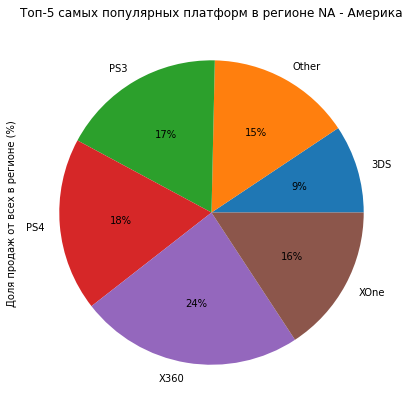

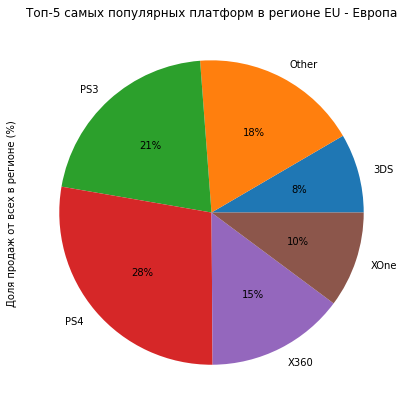

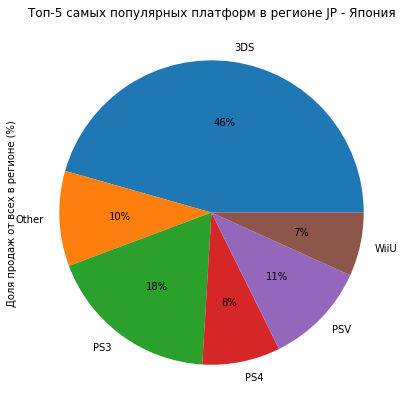

In [47]:
for i in regions.index :
    name = regions['region'][i]
    (ps.pivot_table(index=regions['platform'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных платформ в регионе {name}')
    plt.show()

In [48]:
print('ТОП - 5 платформ по регионам NA, EU, JP и доли продаж по ним')
ps.na_sales = round(ps.na_sales/ps.na_sales.sum()*100, 2)
ps.eu_sales = round(ps.eu_sales/ps.eu_sales.sum()*100, 2)
ps.jp_sales = round(ps.jp_sales/ps.jp_sales.sum()*100, 2)
ps

ТОП - 5 платформ по регионам NA, EU, JP и доли продаж по ним


,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,23.70,PS4,27.84,3DS,45.59
1,PS4,18.40,PS3,21.08,PS3,18.32
2,PS3,17.49,X360,14.70,PSV,10.93
3,XOne,15.76,XOne,10.18,PS4,8.29
4,3DS,9.36,3DS,8.41,WiiU,6.76
5,Other,15.29,Other,17.78,Other,10.12


**Вывод по топ-5 самых популярных платформ по регионам**

- Выяснилось, что пользователи по регионам в основном используют платформы в соответствии с долями указанными в таблице выше.
- В топ-5 регионах `NA` и `EU` входят одинаковые платформы с перестановкой их предпочтения.
- На рынке `JP` присутствуют специализированные региональные платформы. Платформа `3DS` занимает 46% рынка.

#### Топ-5 самых популярных жанров по регионам

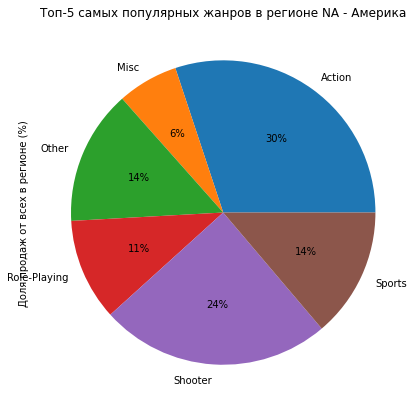

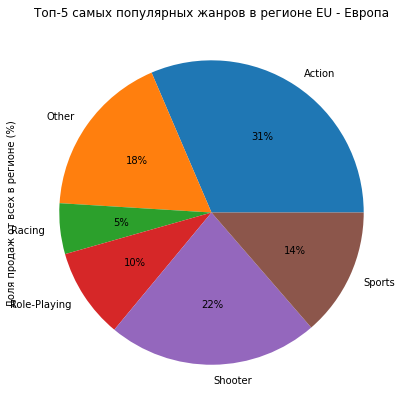

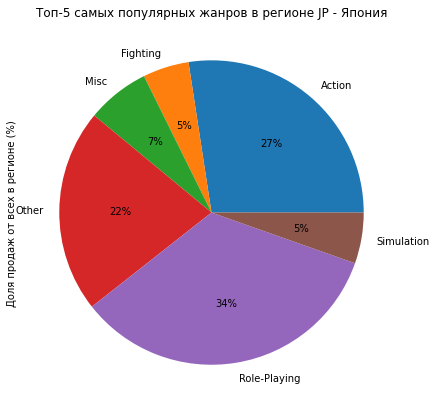

In [49]:
na = (
      actual_df
        .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'genre'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_df
        .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'genre'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_df
        .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'genre'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
gs = pd.merge(na, eu, left_index=True, right_index=True)
gs = pd.merge(gs, jp, left_index=True, right_index=True)
gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 

for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных жанров в регионе {name}')
    plt.show()

In [50]:
print('ТОП - 5 жанров по регионам NA, EU, JP и доли продаж по ним')
gs.na_sales = round(gs.na_sales/gs.na_sales.sum()*100, 2)
gs.eu_sales = round(gs.eu_sales/gs.eu_sales.sum()*100, 2)
gs.jp_sales = round(gs.jp_sales/gs.jp_sales.sum()*100, 2)
gs

ТОП - 5 жанров по регионам NA, EU, JP и доли продаж по ним


,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,Action,30.09,Action,31.44,Role-Playing,33.98
1,Shooter,24.50,Shooter,22.39,Action,27.42
2,Sports,13.80,Sports,13.63,Misc,6.68
3,Role-Playing,10.83,Role-Playing,9.58,Simulation,5.41
4,Misc,6.46,Racing,5.38,Fighting,4.90
5,Other,14.32,Other,17.58,Other,21.62


**Вывод по топ-5 жанров по регионам**

Выяснилось, что пользователи по регионам предпочитают жанры игр в соответствии с долями указанными в таблице выше. В топ-5 в регионах `NA` и `EU` входят одинаковые жанры почти с одинаковым распределением. На рынке `JP` предпочитают `Role-Playing` и `Action` которые суммарно занимают почти 60% рынка.

#### Влияние рейтинга ESRB на продажи в регионах

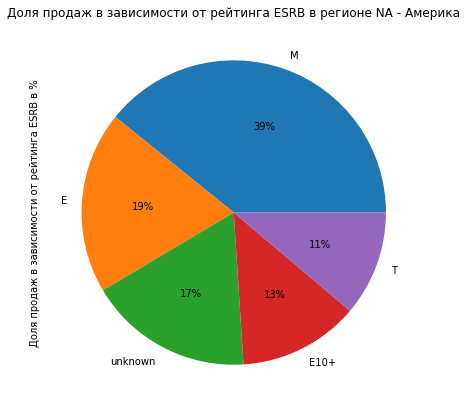

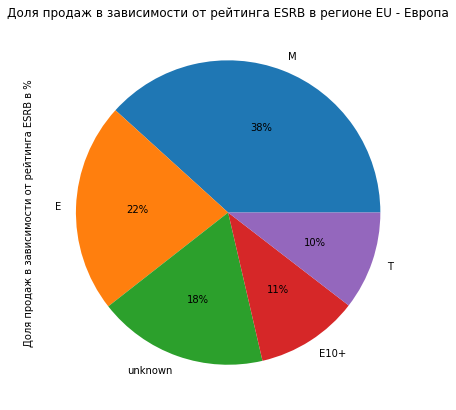

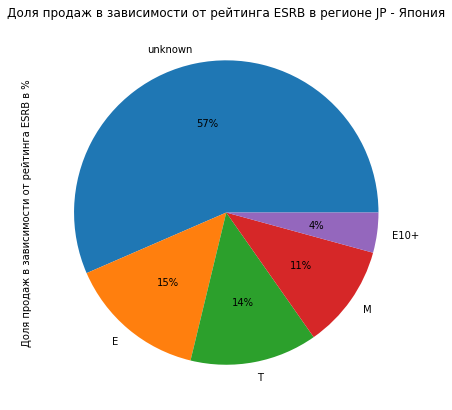

In [51]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    if region == 'na_sales':
        name = 'NA - Америка'
    elif region == 'eu_sales':
        name = 'EU - Европа'
    else:
        name = 'JP - Япония'
    (actual_df.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)
     .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(7, 7), legend=False, title = region)
     .set(ylabel='Доля продаж в зависимости от рейтинга ESRB в %')
    )
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {name}')
    plt.show()

**Вывод по рейтингу ESRB**

В регионах `NA` и `EU` большая часть продаж приходится на рейтинг `M` (для взрослых) - 38-39%, на втором месте с рейтингом для всех `Е` 19-22%. На рынке `JP` первое место занимают игры с неуказанным рейтингом `unknown` - 57%, затем игры для всех `Е` - 15%.

**Вывод по портрету пользователя в зависимости от региона**

- Портрет пользователя в регионах `NA` и `EU` почти совпадает. Лидирует платформа `PS4`, `PS3`, `X360` жанры `Action`, `Sports` игры с рейтингом `M` - для взрослых.
- Портрет пользователя из региона `JP` консоль `3DS`, `PS3` жанр `Role-Playing`, `Action` игры с неуказанным рейтингом `unknown`.

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

Выдвинем гипотезы:

- Н0: Средние пользовательские рейтинги платформ `XOne` и `PC` равны
- Н1: Средние пользовательские рейтинги платформ `XOne` и `PC` не равны

In [52]:
xone = actual_df.query('platform == "XOne" and user_score > -1')
print('Описательная статистика пользовательских рейтингов по XOne\n\n', xone['user_score'].describe())
pc = actual_df.query("platform == 'PC' and user_score > -1")
print('Описательная статистика пользовательских рейтингов по PC\n\n', pc['user_score'].describe())

Описательная статистика пользовательских рейтингов по XOne

 count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Описательная статистика пользовательских рейтингов по PC

 count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


Предварительный описательный анализ указывает, что выборки не равны в размерах. У них разные среднеквадратические отклонения, а значит и дисперсии. Критерий проверки обычно устанавливают в пределах от 1% до 10%. В общем случае установим критерий проверки 5%.

In [53]:
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var=False,
    alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод по пользовательским рейтингам и платформам `XOne` и `PC`**

Не получилось отвергнуть нулевую гипотезу. Есть основания утверждать, что рейтинги платформ `XOne` и `PC` равны, при установленном уровне значимости в 5 %.

#### Средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные

**Будем исходить от противного и выдвинем гипотезы:**

- Н0: Средние пользовательские рейтинги жанров Action и Sports равны
- Н1: Средние пользовательские рейтинги жанров Action и Sports не равны

Если отвергнем нулевую гипотезу, то подтвердим их разность.

In [54]:
action = actual_df.query('genre == "Action" and user_score > -1')
print('Описательная статистика пользовательских рейтингов по Action\n\n', action['user_score'].describe())
sports = actual_df.query("genre == 'Sports' and user_score > -1")
print('Описательная статистика пользовательских рейтингов по Sports\n\n', sports['user_score'].describe())

Описательная статистика пользовательских рейтингов по Action

 count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Описательная статистика пользовательских рейтингов по Sports

 count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


Предварительный описательный анализ указывает, что выборки не равны в размерах. У них разные среднеквадратические отклонения, а значит и дисперсии. Критерий проверки обычно устанавливают в пределах от 1% до 10%. В общем случае установим критерий проверки 5%.

In [55]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False, #для различных дисперсий
    alternative='two-sided') #для проверки на неравенство (в обе стороны)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.989458066467418e-20
Отвергаем нулевую гипотезу


**Вывод по пользовательским рейтингам и жанрам `Action` и `Sports`**

Нулевая гипотеза отвергнута. Исходя от противного есть основания утверждать, что рейтинги жанров `Action` и `Sports` не равны, а значит разные, при установленном уровне значимости в 5 %.

**Вывод по гипотезам**

- Не получилось отвергнуть нулевую гипотезу. Есть основания утверждать, что рейтинги платформ `XOne` и `PC` равны, при установленном уровне значимости в 5 %.
- Нулевая гипотеза отвергнута. Есть основания утверждать, что рейтинги жанров `Action` и `Sports` не равны, а значит разные, при установленном уровне значимости в 5 %.

**Нулевая и альтернативная гипотезы**

- Первая задача
 - Задаваемый вопрос "Средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые?" полностью совпадает с формулировкой нулевой гипотезы (которая всегда определяется как равна) Н0: Средние пользовательские рейтинги платформ `XOne` и `PC` равны.
 - Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про равенство, значит проверку надо провести двухстороннюю `alternative='two-sided'`.
- Вторая задача
 - Задаваемый вопрос "Средние пользовательские рейтинги жанров `Action` и `Sports` разные?" не может быть проверен прямо, ведь нулевая гипотеза должна быть всегда равна, поэтому выдвинута нулевая гипотеза как равна Н0: Средние пользовательские рейтинги жанров `Action` и `Sports` равны, в данном случае если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные.
 - Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про не равенство, значит проверку надо провести двухстороннюю `alternative='two-sided'`.
 
Из предыдущего анализа выявили, что выборочные средние имеют нормальное распределение, выборки достаточны (>30 наблюдений), что означает требование нормальности исходных значений. Следовательно для проверки гипотез можно применить статистические методы анализа и t-критерий Стьюдента.

Статистические методы Puthon оперируют с P-значением (англ. P-value), p-уровень значимости, p-критерий, который означает возможность получить вероятность для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна, а практически оперирует площадями под кривой нормального распределения.

Для подтверждения или опровержения необходимо установить уровень значимости для того или иного сравнения процессов, обычно его выбирают из размерного ряда 1 - 10 %, в зависимости от изученности и требовательности к данным. Обычно его устанавливают в среднем значении 5% или 0,05.

Дополнительная проверка данных на их размерность и дисперсию (среднеквадратическое отклонение) указывает на необходимость применить метод `ttest_ind` с параметром `equal_var=False`.

### Общий вывод

В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах, были отработаны принципы работы с данными по выявлению определяющих успешность игры закономерностях. Выполнены следующие этапы и сделаны выводы:

**1. Изучили общую информацию**

- Всего в таблице 16715 строк и 11 колонок, имеются пропуски в данных;
- Названия колонок имеют нарушение стилей;
- Ряд колонок имеет неверный тип;
- Данных достаточно для проведения исследования.

**2. Предобработали данные**

- Явные дубликаты не обнаружены;
- Удалены строки с неявными дубликатами поиск одновременно по `name`, `platform`, `year_of_release`;
- По столбцу `name` удалены 2 строки с пропусками;
- По столбцу `year_of_release` принято решение удалить строки с пропусками;
- В столбце `critic_score` количество пропусков больше 51% они обозначены как `-1`;
- В столбце `user_score` количество пропусков больше 40% они обозначены как `-1`, неописанное значение `tbd` обозначено как `-2`;
- В столбце `rating` пропуски обозначены как `unknown`;
- Столбцы `year_of_release`, `critic_score` приведены к `int` типу, `user_score` к `float` в соответствии с данными содержащимися в них;
- Пропуски могли появиться из-за сбора данных из различных источников, которые не согласованы между собой;
- Посчитали суммарные продажи во всех регионах записали в `total_sales`.

**3. Провели исследовательский анализ данных**

- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок);
- Определили, что актуальный период составляет 4 последних года;
- На 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли `PS4` и `XOne`, но у них также прослеживаются уменьшения продаж;
- Между оценками пользователей и продажами слабая связь и нелинейная;
- Между оценками критиков и продажами связь умеренная и скорее всего нелинейная;
- Предпочтение в жанрах надо отдавать `Shooter` и `Sports`, обладающих большим медианным значением прибыли.

**4. Составили портрет пользователя каждого региона**

- Портрет пользователя в регионах `NA` и `EU` почти совпадает. Лидирует платформа `PS4`, `PS3`, `X360` жанры `Action`, `Sports` игры с рейтингом `M` - для взрослых.
- Портрет пользователя из региона `JP` консоль `3DS`, `PS3` жанр `Role-Playing`, `Action` игры с неуказанным рейтингом `unknown`.

**5. Проверили гипотезы**

- Не получилось отвергнуть нулевую гипотезу. Есть основания утверждать, что рейтинги платформ `XOne` и `PC` равны, при установленном уровне значимости в 5 %.
- Нулевая гипотеза отвергнута. Есть основания утверждать, что рейтинги жанров `Action` и `Sports` не равны, а значит разные, при установленном уровне значимости в 5 %.
- Дано пояснение по вопросам:
  - Как вы сформулировали нулевую и альтернативную гипотезы;
  - Какой критерий применили для проверки гипотез и почему.

**6. Сделали выводы**

В целях увеличения прибыли интернет магазина "Стримчик" необходимо запланировать проведение рекламных компаний игр на потенциально популярные продукты, а именно: платформа `PS4`, жанры `Shooter` и `Sports` с рейтингом `M` (для взрослых).

<div class="alert alert-info
**Комментарий студента**
    
Критический недочёт исправил!

</div>